# Overview Kaggle Submissions 

## ** Notebook Content **

1. Introduction & Goals


2. Importing the required packages & Loading the data


3. Kaggle Submissions & Results
    - 3.1 Logistics Regression
    - 3.2 Random Forest Regressor
    - 3.3 Artificial Neural Network

## 1. Introduction & Goals 

The objetctive of this notebook is to create a summary of the total submissions created in the Kaggle competition, which is  called [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), by the bcnDataScience team.

Here we are includding the details of the files generated for each submission and the results achieved in the competition, both the final results and the progress experienced in the life of the project.

We hope you enjoy!

## 2. Importing the required packages & Loading the data

Let's import the requiered python packages in order to have all the tools ready for our analysis in this notebook.

In [3]:
#Importing the requiered packages
import numpy as np
import pandas as pd
from IPython.core.display import Image

Now, we proceed to load the data that we need to create the summary of the submissions delivered by our team during the Kaggle competition.

In [5]:
#load the predicted values by the Logistics Regression
lg_test_final_results = pd.read_csv('y_pred_logreg_test.csv')
lg_test_final_results.head()

,0
0,176000.0
1,158000.0
2,190000.0
3,215000.0
4,201000.0


In [4]:
#load the predicted values by the Random Forest Regressor
rf_test_final_results = pd.read_csv('y_pred_rf_test.csv')
rf_test_final_results.head()

,0
0,125465.910714
1,157284.681429
2,182329.082857
3,191299.651429
4,191566.130714


In [14]:
#load the predicted values by the ANN
ann_test_final_results = pd.read_csv('y_pred_ann_test.csv')
ann_test_final_results.head()

,SalePrice
0,106053.516
1,186427.400
2,203674.380
3,178566.020
4,165832.030


Finally, we have to load the original test data because we need to merge the "Id" column of the test set with the predicted results (y_pred dataframes) in order to comply with the Kaggle rules, as one of them is to upload a file with 1459 prediction rows and a header row with the "Id" and "SalePrice" columns.

So, we are going to compile this information in several dataframe (each according to the type of model used) and create a submission in the Kaggle Leaderboard. 

Let's do it!

In [7]:
#upload the original test data (we need to recover the 'Id' column)
df_test_original = pd.read_csv('test.csv')
df_test_original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
#Creating the "Id_test" dataframe to merge the Id column of the test set with the y_pred_4 results later 
Id_test = df_test_original[['Id']]
Id_test.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


## 3. Kaggle Submissions & Results

### 3.1 Logistics Regression

In [18]:
#Merging the "Id_test" set with the rf_test_final_results 
logreg_final_results = pd.concat([Id_test, lg_test_final_results], axis=1,)
logreg_final_results.head()

,Id,0
0,1461,176000.0
1,1462,158000.0
2,1463,190000.0
3,1464,215000.0
4,1465,201000.0


In [19]:
#check the shape of the ann_training_final_results dataframe
logreg_final_results.shape

(1459, 2)

In [20]:
#rename the columns of the  rf_final_results dataframe
logreg_final_results.columns = ['Id', 'SalePrice']
logreg_final_results.columns

Index(['Id', 'SalePrice'], dtype='object')

In [ ]:
#export the rf_final_results and y_pred_4 to csv
logreg_final_results.to_csv('logreg_final_results.csv', index=False)  

Once we have generated the file for kaggle submission, we proceed to upload it and verify the results obtained:

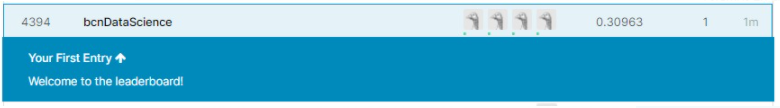

In [21]:
Image('LogisticsRegression-Results_KaggleCompetition.PNG')

__Comments:__ The kaggle system has categorized our job with a Score of 0.30963 after submitting the final results got with the Logistics Regression model. The lower the score achieved in kaggle the better, so we will try to improve it with the random forest and ann models.

### 3.2 Random Forest Regressor

In [14]:
#Merging the "Id_test" set with the rf_test_final_results
rf_final_results = pd.concat([Id_test, rf_test_final_results], axis=1,)
rf_final_results.head()

,Id,0
0,1461,125465.910714
1,1462,157284.681429
2,1463,182329.082857
3,1464,191299.651429
4,1465,191566.130714


In [15]:
#check the shape of the ann_training_final_results dataframe
rf_final_results.shape

(1459, 2)

In [16]:
#rename the columns of the  rf_final_results dataframe
rf_final_results.columns = ['Id', 'SalePrice']
rf_final_results.columns

Index(['Id', 'SalePrice'], dtype='object')

In [ ]:
#export the rf_final_results and y_pred_4 to csv
rf_final_results.to_csv('logreg_final_results.csv', index=False)  

Once we have generated the file for kaggle submission, we proceed to upload it and verify the results obtained:

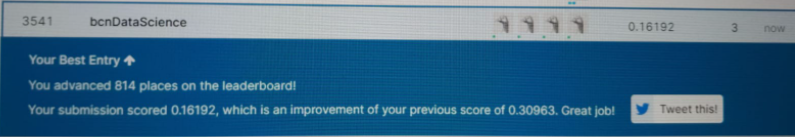

In [20]:
Image('RandomForest-Results_KaggleCompetition.PNG')

__Comments:__ We realized that the score achived in Kaggle has considerably improved after delivering the values predicted by the Random Forest Regressor, from 0.30963 to 0.16192 respectively. 

We are happy with the results. However, we will try to improve the score testing the values predicted by the Artificial Neural Network in another submission.

### 3.3 Artificial Neural Network 

In [15]:
#Merging the "Id_test" set with the ann_test_final_results
ann_final_results = pd.concat([Id_test, ann_test_final_results], axis=1,)
ann_final_results.head()

,Id,SalePrice
0,1461,106053.516
1,1462,186427.400
2,1463,203674.380
3,1464,178566.020
4,1465,165832.030


In [16]:
#check the shape of the ann_training_final_results dataframe
ann_final_results.shape

(1459, 2)

In [17]:
#rename the columns of the  rf_final_results dataframe
ann_final_results.columns = ['Id', 'SalePrice']
ann_final_results.columns

Index(['Id', 'SalePrice'], dtype='object')

In [18]:
#export the rf_final_results and y_pred_4 to csv
ann_final_results.to_csv('ann_final_results.csv', index=False)  

Once we have generated the file for kaggle submission, we proceed to upload it and verify the results obtained:

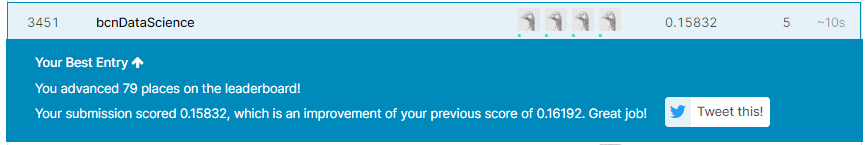

In [19]:
Image('ANN-Results_KaggleCompetition.PNG')

__Comments:__ We verify that we have __achieved the best result in the competition by predicting the values of the SalePrice variable applying the ANN__, since we have obtained a score of 0.15832, which is bigger than the score achived with the Random Forest Regressor (0.16192).

End of the notebook.

Thanks for readying!